In [18]:
import pandas as pd
import seaborn as sns

In [12]:
# import
df_NEES = pd.read_csv('Output/NEES_summary.csv')
df_ddF = pd.read_excel('SourceData/ddF.xlsx')

In [13]:
# Create AH name column
df_ddF['AH_name'] = df_ddF['Protein_Name'] + '-' + df_ddF['AH#'].astype(str)
df_ddF['AH_name'] = df_ddF['AH_name'].str.replace('-1', '')
# lowercase
df_ddF['AH_name'] = df_ddF['AH_name'].str.lower()

# lowercase
df_NEES['AH'] = df_NEES['AH'].str.lower()

# merge
df = pd.merge(df_ddF, df_NEES, left_on='AH_name', right_on='AH', how='inner')

In [14]:
# Bin NEES median values by arbitrary thresholds
def categorize_NEES(value):
    thresholds = [0.5, 0.7, 1.0]
    if value <= thresholds[0]:
        return 'No Response'
    elif thresholds[0] < value <= thresholds[1]:
        return 'Moderate Response'
    elif thresholds[1] < value <= thresholds[2]:
        return 'High Response'
    else:
        return 'Very High Response'

# Apply the function to the Median column
df['NEES_binned'] = df['Median'].apply(categorize_NEES)

In [15]:
df.to_csv('./Output/ddFvsNEES.csv', index=False)

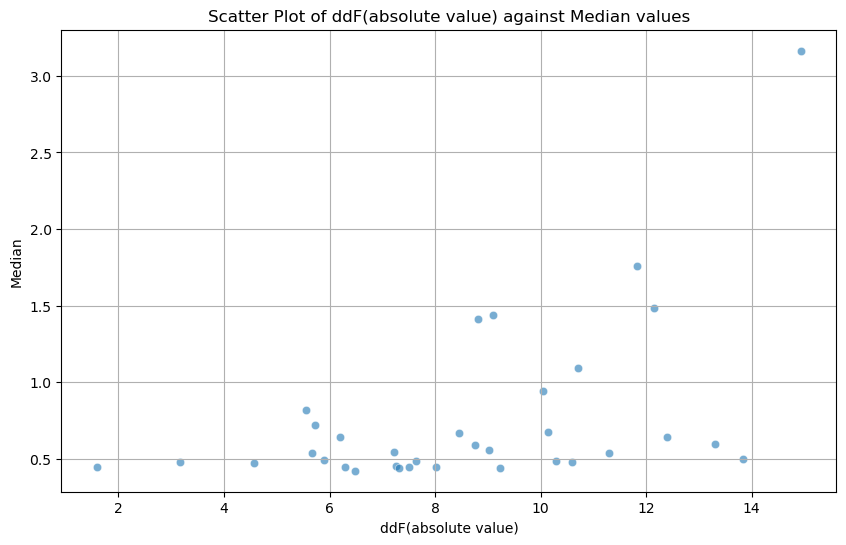

In [20]:
import matplotlib.pyplot as plt

# Create a new column for the absolute values of ddF
df['ddF(absolute value)'] = df['ddF'].abs()

# Plotting the absolute ddF values against Median values
plt.figure(figsize=(10, 6))
plt.scatter(df['ddF(absolute value)'], df['Median'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of ddF(absolute value) against Median values')
plt.xlabel('ddF(absolute value)')
plt.ylabel('Median')
plt.grid(True)
plt.show()

In [16]:
# Define the specific order for the NEES_binned categories
order = ['No Response', 'Moderate Response', 'High Response', 'Very High Response']

/var/folders/qv/j3ddjz6j0qq0nh7cbqghj4wh0000gn/T/ipykernel_3887/329824389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NEES_binned', y='ddF(absolute value)', data=df, order=order, palette="Blues")


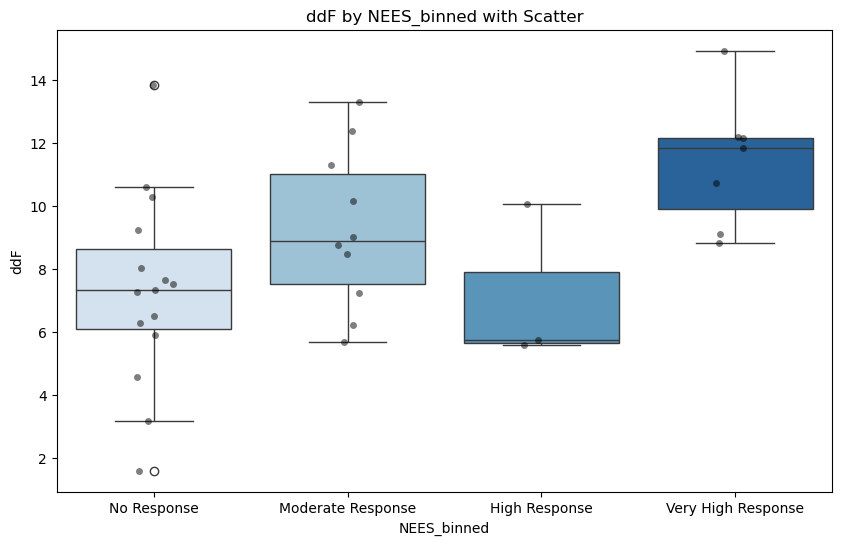

In [22]:
# Create a box plot overlaid with scatter plot for 'ddF(absolute value)' by 'NEES_binned'
plt.figure(figsize=(10, 6))

# Create a boxplot with the specified order
sns.boxplot(x='NEES_binned', y='ddF(absolute value)', data=df, order=order, palette="Blues")

# Add scatter points jittered for better visualization
sns.stripplot(x='NEES_binned', y='ddF(absolute value)', data=df, order=order, color='black', jitter=True, alpha=0.5)

plt.title('ddF by NEES_binned with Scatter')
plt.xlabel('NEES_binned')
plt.ylabel('ddF')
plt.show()